# Imports

In [189]:
import numpy as np
import random
import pylab
from scipy import stats
import pylab as pl
import mpl_toolkits


import pandas as pd
from sklearn.datasets import make_blobs
import plotly.express as px
import seaborn as sns
from sklearn.tree import export_graphviz
from matplotlib import pyplot as plt
# import plotly as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor


# Data

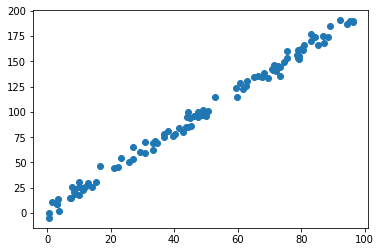

In [211]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

# Nesterov

In [292]:
EPOCHS = 30
LEARNING_RATE = 0.00005
gamma = 0.9

costs = []
params = []
preds = []
v = [0,0]

params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    v[0] = v[0] * gamma + LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    v[1] = v[1] * gamma + LEARNING_RATE * np.sum((predictions - Y) * X) / len(predictions) 
    
    params[0] = params[0] - v[0]
    params[1] = params[1] - v[1]
    
    

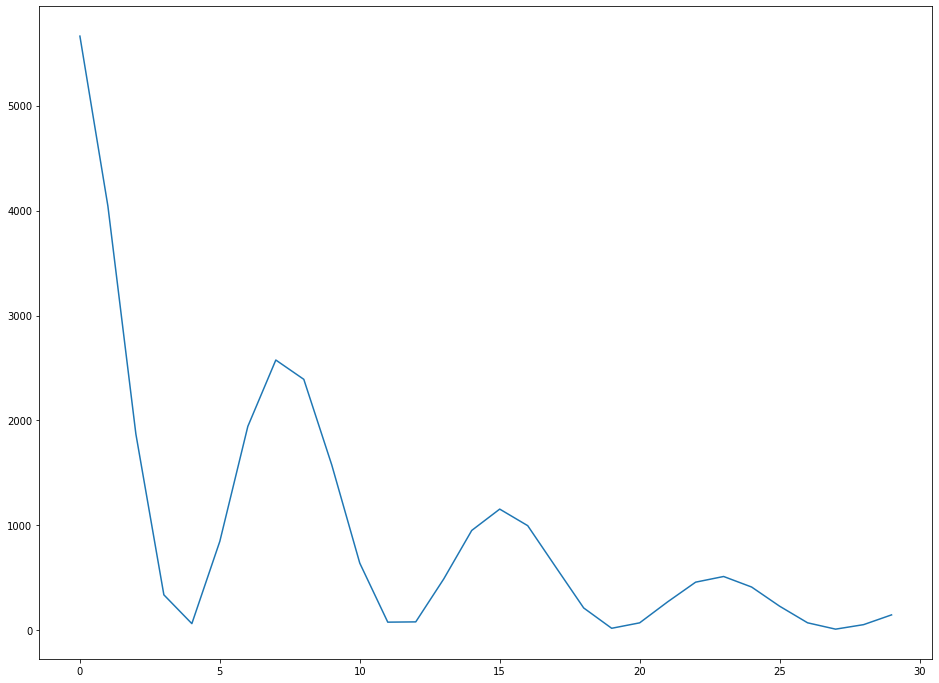

In [293]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

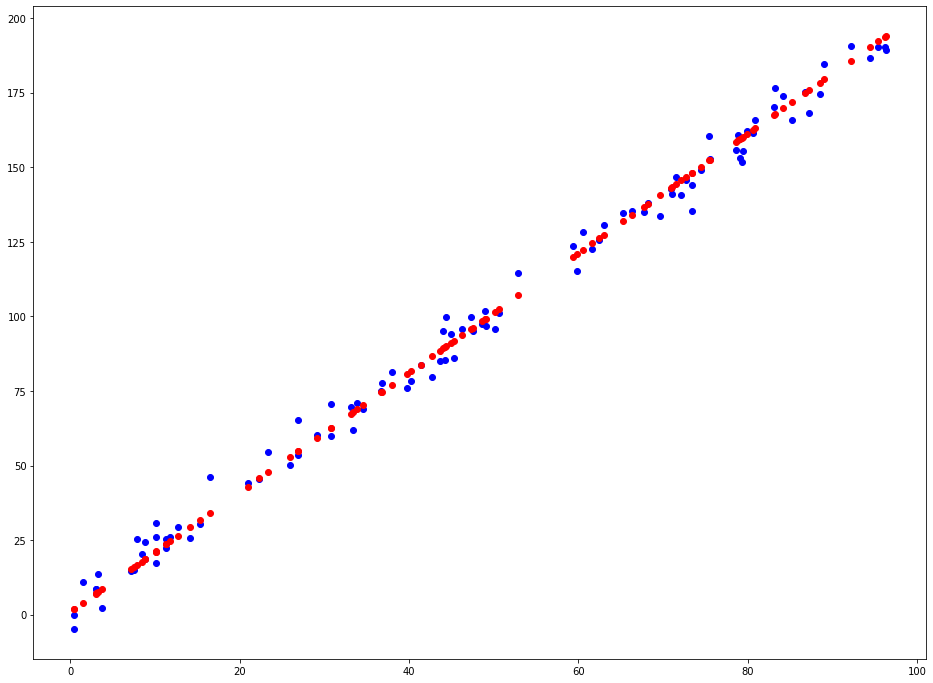

In [294]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[27], color='red')
plt.show()

# rmsprop

In [295]:
EPOCHS = 30
LEARNING_RATE = 0.1
gamma = 0.9

costs = []
params = []
preds = []
EG = [0,0]
eps  = 0.000001

params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
  
    EG[0] = gamma * EG[0] + (1 - gamma) * (np.sum(predictions - Y) / len(predictions)) ** 2
    EG[1] = gamma * EG[1] + (1 - gamma) * (np.sum((predictions - Y) * X) / len(predictions)) ** 2    
    
    params[0] = params[0] - LEARNING_RATE / np.sqrt(EG[0] + eps) * (np.sum(predictions - Y) / len(predictions))
    params[1] = params[1] - LEARNING_RATE / np.sqrt(EG[1] + eps) * (np.sum((predictions - Y) * X) / len(predictions))

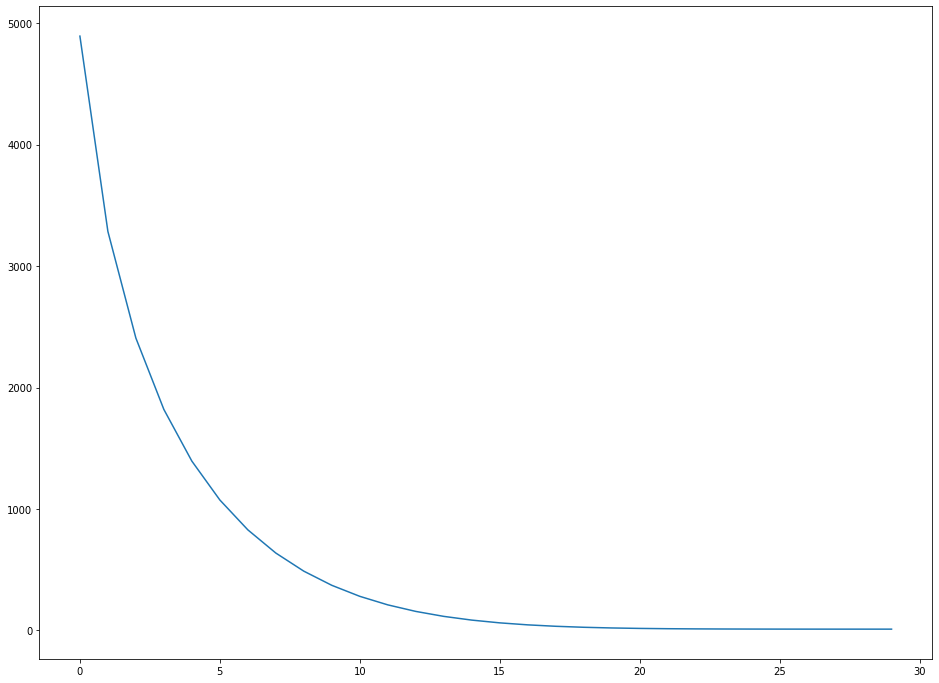

In [296]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

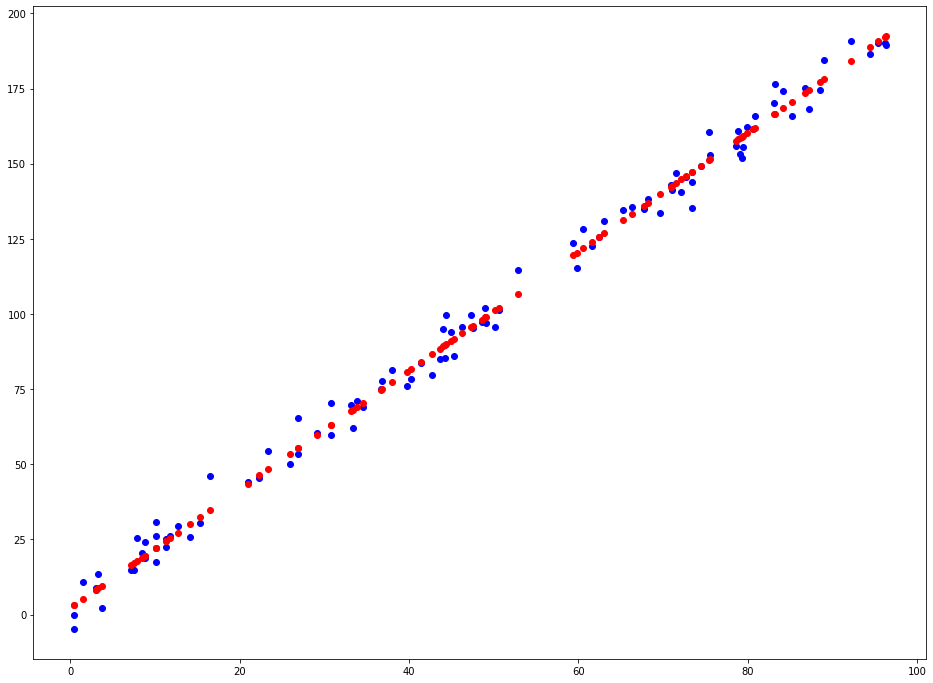

In [297]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[29], color='red')
plt.show()